# **Final Project In Association With The MMT Observatory**

![Banner Photo](https://www.mmto.org/themes/marinelli/img/banners/rotate.php)
                                                                                
## ***M101 Chemical Abundances***



##### **Author:** Spencer Long
##### **Co Author:** Lulu The Cat
##### **Class:** Astro 320 Spectroscopy

<div>
<img src='Images/lulu.JPG' width="300" >
</div>

---
---
---

# *Imports*

In [259]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy import units as u

plt.style.use('seaborn')

In [260]:
# Creating a function to access reduced data and plots 

def spectra_extraction(file_loc, labels = False, plot = False):
    
    ###### Accessing Fits File Data ######
    hdul = fits.open(file_loc)
    # Assgining variable to call header data of fits file
    manual = hdul[0].header
    # Storing Flux density data into memory (will be used for our y axis)
    data = hdul[0].data 
    
    ###### Creating The X Axis ######
    cdelt1 = manual['CDELT1']
    shift_x = manual['CRPIX1']*manual['CDELT1']
    crval1 = manual['CRVAL1']
    x = np.arange(crval1-shift_x,len(data) * cdelt1+crval1-shift_x,cdelt1)
    
    if plot == True:
    
        ###### Ploting ######
        plt.figure(figsize = (24, 8))
        plt.title('Flux Vs. Wavelength')
        plt.xlabel('Wavelength ($\AA$)', fontsize = 15)
        plt.ylabel('Flux', fontsize = 15)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.xlim(x[0],x[-1])
        plt.plot(x[:-1], data, color = 'black')
    
    if labels == True:
        
        lines = [
                r'$[OII]\lambda 3727$',
                r'$[OIII]\lambda 4363$',
                r'$[OIII]\lambda 4959$',
                r'$[OIII]\lambda 5007$',
                r'$H\alpha$',
                r'$H\beta$',
               ]
        wl = [
              3727,
              4363,
              4959,
              5007,
              6563,
              4861
             ]
        
        plt.figure(figsize=(24,8))

        for i in range(len(lines)):
            
            if i in range(0,len(lines),2):
                plt.axvline(x = wl[i], color = 'k', ls=':')
                plt.annotate(lines[i], xy=(wl[i],data.max()-.1e-14), xytext=(wl[i],data.max()-.1e-14), fontsize=15)
            if i % 2 != 0:
                plt.axvline(x = wl[i], color = 'k', ls=':')
                plt.annotate(lines[i], xy=(wl[i],data.max()-1.2e-14), xytext=(wl[i],data.max()-1.2e-14), fontsize=15)
        
        plt.title(f'Flux Vs. Wavelength: file "{file_loc[52:]}" w/ Labels', fontsize =17)
        plt.xlabel('Wavelength ($\AA$)', fontsize = 15)
        plt.ylabel('Flux', fontsize = 15)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        #plt.xlim(x[0],x[-1])
        #plt.ylim(0,data.max())
        plt.plot(x[:-1],data)
        plt.show()
        
    return

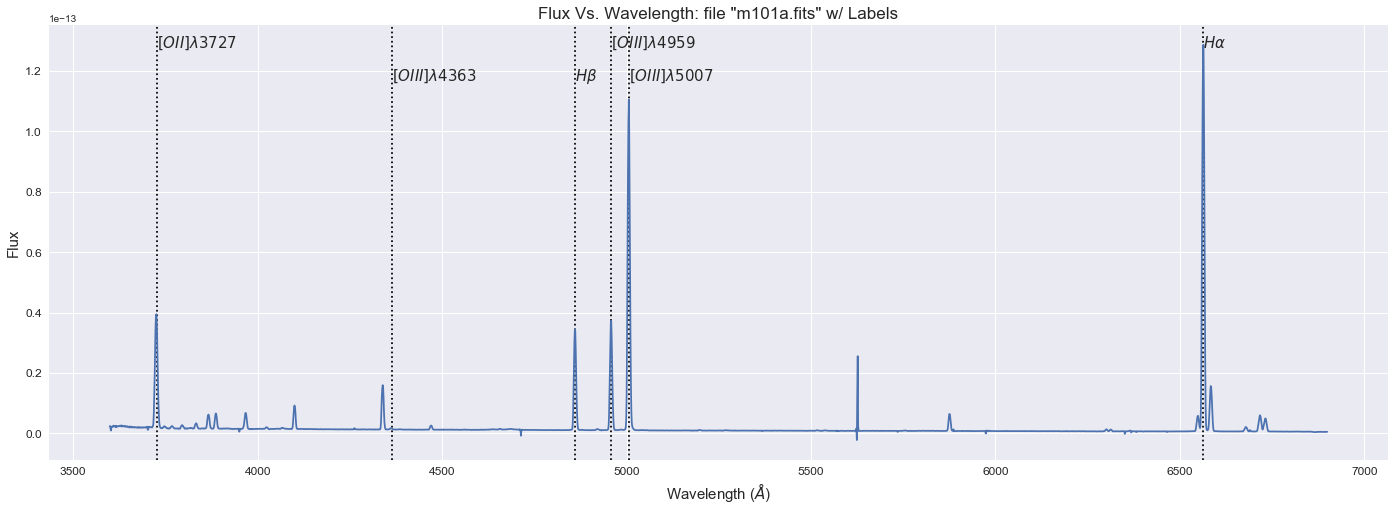

In [261]:
spectra_extraction('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/m101a.fits',labels = True)

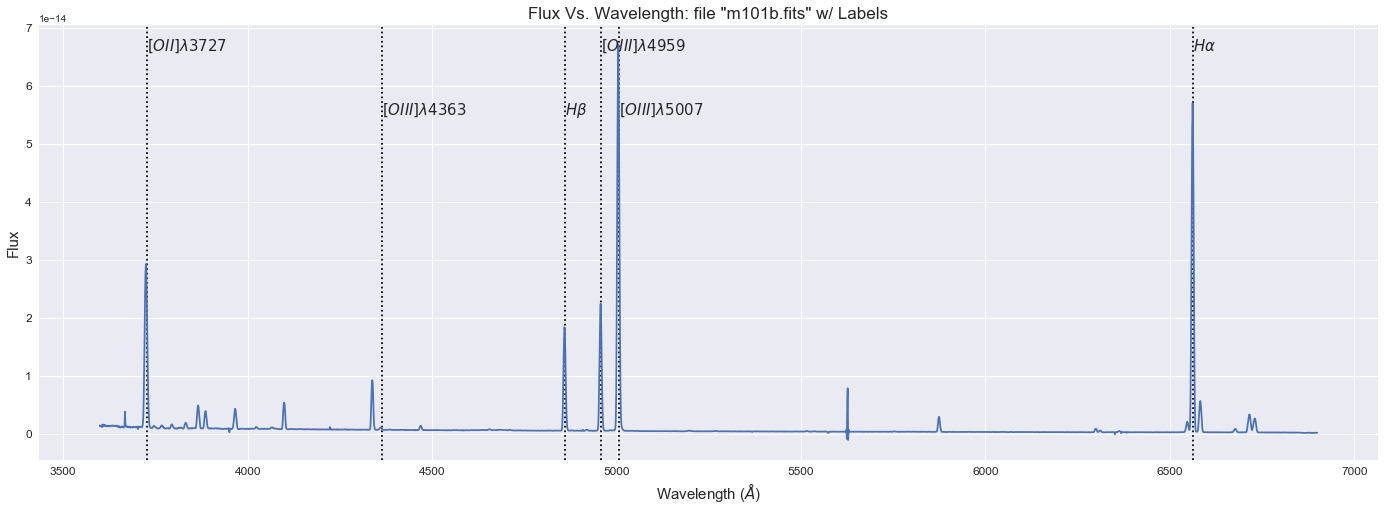

In [262]:
spectra_extraction('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/m101b.fits',labels = True)

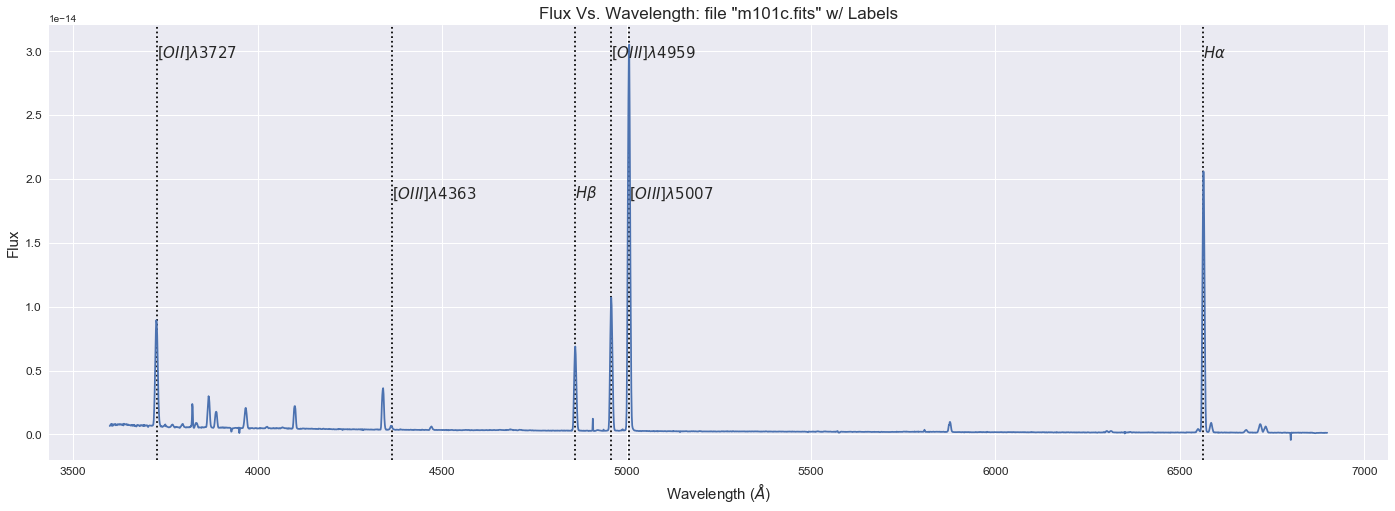

In [263]:
spectra_extraction('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/m101c.fits',labels = True)

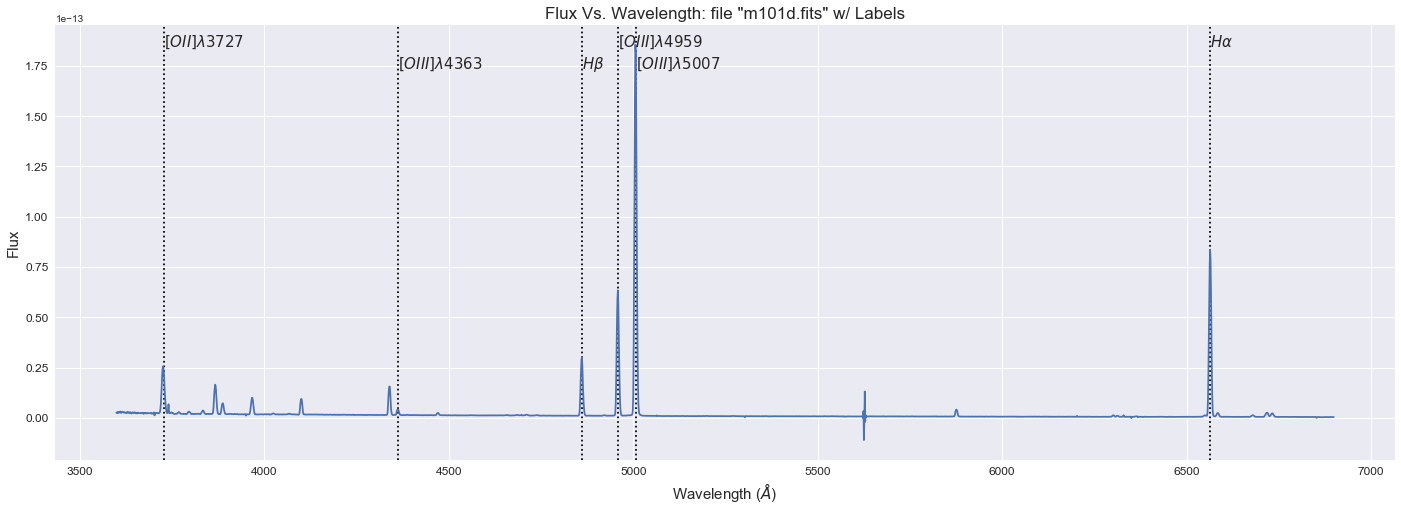

In [264]:
spectra_extraction('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/m101d.fits',labels = True)

---
# Flux Measurements:

In [272]:
# Lines that flux measurements are obtained
lines = [
         r'$[OII]\lambda 3727$',
         r'$[OIII]\lambda 4363$',
         r'$H\beta\lambda 4861$',
         r'$[OIII]\lambda 4959$',
         r'$[OIII]\lambda 5007$',
         r'$H\alpha\lambda 6563$'
        ]

# Flux measurements obtained using a gaussian fit via Splot (program within the Pyraf library) 
flux_a =  [
           3.24E-13,
           2.67E-15,
           2.43E-13,
           2.62E-13,
           7.90E-13,
           9.32E-13
          ]

flux_b =  [
           2.38E-13,
           2.70E-15,
           1.24E-13,
           1.55E-13,
           4.61E-13,
           4.01E-13
          ]

flux_c =  [
           6.79e-14,
           1.96e-15,
           4.78e-14,
           7.37e-14,
           2.23e-13,
           1.42e-13
          ]

flux_d =  [
           2.09e-13,
           1.76e-14,
           2.04e-13,
           4.43e-13,
           1.32e-12,
           5.99e-13
          ]

In [285]:
# Creating a dataframe to place all of our calculated data for each individual line. 

indexx = ['Flux_a:', 'Flux_b:', 'Flux_c:', 'Flux_d:']

flux_df = pd.DataFrame(data=[flux_a, flux_b, flux_c, flux_d], index = indexx, columns=lines)
flux_df

,$[OII]\lambda 3727$,$[OIII]\lambda 4363$,$H\beta\lambda 4861$,$[OIII]\lambda 4959$,$[OIII]\lambda 5007$,$H\alpha\lambda 6563$
Flux_a:,3.240000e-13,2.670000e-15,2.430000e-13,2.620000e-13,7.900000e-13,9.320000e-13
Flux_b:,2.380000e-13,2.700000e-15,1.240000e-13,1.550000e-13,4.610000e-13,4.010000e-13
Flux_c:,6.790000e-14,1.960000e-15,4.780000e-14,7.370000e-14,2.230000e-13,1.420000e-13
Flux_d:,2.090000e-13,1.760000e-14,2.040000e-13,4.430000e-13,1.320000e-12,5.990000e-13


In [267]:
# indexing for calculations
(flux_df['$[OIII]\lambda 4363$'][0]*100)/flux_df['$H\\beta\\lambda 4861$'][0]

1.0987654320987654

---
# *Part A.)*

# Normalize Fluxes to The Flux of $H\beta$:

$H\beta$ is taken to have a flux of 100. Round to the nearest integer, except for $[OIII]\lambda 4363$ (use one significant digit).

**Definition of Normalize:** Multiply (a series, function or item of data) by a factor that makes the norm or some associated quantity such as an integral equal to a desired value (usually 1).

In [372]:
def normalize_flux_ratios(df):
    for column in df.columns:
        for row in range(0,4):
            flux_ratio = (df[column][row]*100)/df['$H\\beta\\lambda 4861$'][row]
            print(flux_ratio.round(0))

In [380]:
normalize_flux_ratios(flux_df)

133.0
192.0
142.0
102.0
1.0
2.0
4.0
9.0
100.0
100.0
100.0
100.0
108.0
125.0
154.0
217.0
325.0
372.0
467.0
647.0
384.0
323.0
297.0
294.0


In [280]:
oii_3727 = [133.0,
            192.0,
            142.0,
            102.0]

oiii_4363 = [1.0,
             2.0,
             4.0,
             9.0]

hbeta = [100.0,
         100.0,
         100.0,
         100.0]

oiii_4959 = [108.0,
             125.0,
             154.0,
             217.0]

oiii_5007 = [325.0,
             372.0,
             467.0,
             647.0]
halpha = [384.0,
          323.0,
          297.0,
          294.0]

In [308]:
columns = ['M101_a:', 'M101_b:', 'M101_c:', 'M101_d:']


norm_line_ratios = pd.DataFrame(data=[oii_3727,oiii_4363,hbeta,oiii_4959,oiii_5007,halpha], index = lines, columns=columns)

from tabulate import tabulate

print(tabulate(norm_line_ratios,headers='keys', tablefmt='psql'))

+-----------------------+-----------+-----------+-----------+-----------+
|                       |   M101_a: |   M101_b: |   M101_c: |   M101_d: |
|-----------------------+-----------+-----------+-----------+-----------|
| $[OII]\lambda 3727$   |       133 |       192 |       142 |       102 |
| $[OIII]\lambda 4363$  |         1 |         2 |         4 |         9 |
| $H\beta\lambda 4861$  |       100 |       100 |       100 |       100 |
| $[OIII]\lambda 4959$  |       108 |       125 |       154 |       217 |
| $[OIII]\lambda 5007$  |       325 |       372 |       467 |       647 |
| $H\alpha\lambda 6563$ |       384 |       323 |       297 |       294 |
+-----------------------+-----------+-----------+-----------+-----------+


---
# *Part B.)*

# Calculating The Values of The Extinction Coefficient $c(H\beta)$:

#### $\frac{F(\lambda)}{F(H\beta)}=\frac{F_0(\lambda)}{F_0(H\beta)}10^{-c[f(\lambda)-f(H\beta)]}$    

Solving for $c(H\beta)$ we obtain the equation: 

#### $c(H\beta)=\frac{\frac{\ln\big(F(H\beta)\cdot \frac{F_0(\lambda)}{}\big)}{F(\lambda)}}{\ln(10)\cdot (f\lambda - f(H\beta))}$

where $c(H\beta) =$ Extinction Coefficient, $F(H\beta) = $ 

<img src='Images/minus_values.png' width=700 style="float:center">

In [541]:
import math

def extinction_coeff(flux_lambda, flux_hbeta, intrinsic_value, f_lambda_minus_f_beta):
    coefficient = (math.log10((flux_hbeta * intrinsic_value) / (flux_lambda))) / (math.log10(10) * (f_lambda_minus_f_beta))
    return round(coefficient, 2)

In [542]:
# H_alpha/H_beta M101a
halpha_coeff_a = extinction_coeff(flux_df['$H\\alpha\\lambda 6563$'][0],flux_df['$H\\beta\\lambda 4861$'][0],2.86,-0.32)

# H_alpha/H_beta M101b
halpha_coeff_b = extinction_coeff(flux_df['$H\\alpha\\lambda 6563$'][1],flux_df['$H\\beta\\lambda 4861$'][1],2.86,-0.32)

# H_alpha/H_beta M101c
halpha_coeff_c = extinction_coeff(flux_df['$H\\alpha\\lambda 6563$'][2],flux_df['$H\\beta\\lambda 4861$'][2],2.86,-0.32)

# H_alpha/H_beta M101d
halpha_coeff_d = extinction_coeff(flux_df['$H\\alpha\\lambda 6563$'][3],flux_df['$H\\beta\\lambda 4861$'][3],2.86,-0.32)

print(halpha_coeff_a,halpha_coeff_b,halpha_coeff_c,halpha_coeff_d)

0.4 0.17 0.05 0.04


---
# *Part C.)*

# Correct The Metal Line Ratios For Interstellar Dust Extinction:

<img src='Images/partc.png' width=700 style="float:center">

In [407]:
def corrected_flux(flux_lambda, flux_hbeta, f_lambda_minus_f_beta, average_coeff_value):
    corrected = (flux_lambda/flux_hbeta) * 10 ** (average_coeff_value*(f_lambda_minus_f_beta))
    return round(corrected*100,0)

In [485]:
# M101a Corrected Fluxes

oii_3727_corrected_flux_a = corrected_flux(flux_df['$[OII]\\lambda 3727$'][0], flux_df['$H\\beta\\lambda 4861$'][0], 0.256, halpha_coeff_a)

oiii_4363_corrected_flux_a = corrected_flux(flux_df['$[OII]\\lambda 3727$'][0], flux_df['$H\\beta\\lambda 4861$'][0], 0.121, halpha_coeff_a)

hbeta_corrected_flux_a = corrected_flux(flux_df['$H\\beta\\lambda 4861$'][0], flux_df['$H\\beta\\lambda 4861$'][0], 0, halpha_coeff_a)

oiii_4959_corrected_flux_a = corrected_flux(flux_df['$[OIII]\\lambda 4959$'][0], flux_df['$H\\beta\\lambda 4861$'][0], -0.024, halpha_coeff_a)

oiii_5007_corrected_flux_a = corrected_flux(flux_df['$[OIII]\\lambda 5007$'][0], flux_df['$H\\beta\\lambda 4861$'][0], -0.036, halpha_coeff_a)

# M101b Corrected Fluxes

oii_3727_corrected_flux_b = corrected_flux(flux_df['$[OII]\\lambda 3727$'][1], flux_df['$H\\beta\\lambda 4861$'][1], 0.256, halpha_coeff_b)

oiii_4363_corrected_flux_b = corrected_flux(flux_df['$[OII]\\lambda 3727$'][1], flux_df['$H\\beta\\lambda 4861$'][1], 0.121, halpha_coeff_b)

hbeta_corrected_flux_b = corrected_flux(flux_df['$H\\beta\\lambda 4861$'][1], flux_df['$H\\beta\\lambda 4861$'][1], 0, halpha_coeff_b)

oiii_4959_corrected_flux_b = corrected_flux(flux_df['$[OIII]\\lambda 4959$'][1], flux_df['$H\\beta\\lambda 4861$'][1], -0.024, halpha_coeff_b)

oiii_5007_corrected_flux_b = corrected_flux(flux_df['$[OIII]\\lambda 5007$'][1], flux_df['$H\\beta\\lambda 4861$'][1], -0.036, halpha_coeff_b)

# M101c Corrected Fluxes

oii_3727_corrected_flux_c = corrected_flux(flux_df['$[OII]\\lambda 3727$'][2], flux_df['$H\\beta\\lambda 4861$'][2], 0.256, halpha_coeff_c)

oiii_4363_corrected_flux_c = corrected_flux(flux_df['$[OII]\\lambda 3727$'][2], flux_df['$H\\beta\\lambda 4861$'][2], 0.121, halpha_coeff_c)

hbeta_corrected_flux_c = corrected_flux(flux_df['$H\\beta\\lambda 4861$'][2], flux_df['$H\\beta\\lambda 4861$'][2], 0, halpha_coeff_c)

oiii_4959_corrected_flux_c = corrected_flux(flux_df['$[OIII]\\lambda 4959$'][2], flux_df['$H\\beta\\lambda 4861$'][2], -0.024, halpha_coeff_c)

oiii_5007_corrected_flux_c = corrected_flux(flux_df['$[OIII]\\lambda 5007$'][2], flux_df['$H\\beta\\lambda 4861$'][2], -0.036, halpha_coeff_c)

# M101d Corrected Fluxes

oii_3727_corrected_flux_d = corrected_flux(flux_df['$[OII]\\lambda 3727$'][3], flux_df['$H\\beta\\lambda 4861$'][3], 0.256, halpha_coeff_d)

oiii_4363_corrected_flux_d = corrected_flux(flux_df['$[OII]\\lambda 3727$'][3], flux_df['$H\\beta\\lambda 4861$'][3], 0.121, halpha_coeff_d)

hbeta_corrected_flux_d = corrected_flux(flux_df['$H\\beta\\lambda 4861$'][3], flux_df['$H\\beta\\lambda 4861$'][3], 0, halpha_coeff_d)

oiii_4959_corrected_flux_d = corrected_flux(flux_df['$[OIII]\\lambda 4959$'][3], flux_df['$H\\beta\\lambda 4861$'][3], -0.024, halpha_coeff_d)

oiii_5007_corrected_flux_d = corrected_flux(flux_df['$[OIII]\\lambda 5007$'][3], flux_df['$H\\beta\\lambda 4861$'][3], -0.036, halpha_coeff_d)

# Lists for Dataframe

oii_3727_corrected_flux_list = [oii_3727_corrected_flux_a,oii_3727_corrected_flux_b,oii_3727_corrected_flux_c,oii_3727_corrected_flux_d]
oiii_4363_corrected_flux_list = [oiii_4363_corrected_flux_a,oiii_4363_corrected_flux_b,oiii_4363_corrected_flux_c,oiii_4363_corrected_flux_d]
hbeta_corrected_flux_list = [hbeta_corrected_flux_a, hbeta_corrected_flux_b, hbeta_corrected_flux_c, hbeta_corrected_flux_d]
oiii_4959_corrected_flux_list = [oiii_4959_corrected_flux_a,oiii_4959_corrected_flux_b,oiii_4959_corrected_flux_c,oiii_4959_corrected_flux_d]
oiii_5007_corrected_flux_list = [oiii_5007_corrected_flux_a, oiii_5007_corrected_flux_b, oiii_5007_corrected_flux_c, oiii_5007_corrected_flux_d]

In [486]:
columns = ['M101_a:', 'M101_b:', 'M101_c:', 'M101_d:']

lines = [
         r'$[OII]\lambda 3727$',
         r'$[OIII]\lambda 4363$',
         r'$H\beta\lambda 4861$',
         r'$[OIII]\lambda 4959$',
         r'$[OIII]\lambda 5007$',
         r'$H\alpha\lambda 6563$'
        ]

corrected_fluxes_df = pd.DataFrame(data=[oii_3727_corrected_flux_list, 
                                         oiii_4363_corrected_flux_list, 
                                         hbeta_corrected_flux_list, 
                                         oiii_4363_corrected_flux_list, 
                                         oiii_4959_corrected_flux_list, 
                                         oiii_5007_corrected_flux_list], index = lines, columns=columns)

from tabulate import tabulate

print(tabulate(corrected_fluxes_df,headers='keys', tablefmt='psql'))

+-----------------------+-----------+-----------+-----------+-----------+
|                       |   M101_a: |   M101_b: |   M101_c: |   M101_d: |
|-----------------------+-----------+-----------+-----------+-----------|
| $[OII]\lambda 3727$   |       169 |       212 |       146 |       105 |
| $[OIII]\lambda 4363$  |       149 |       201 |       144 |       104 |
| $H\beta\lambda 4861$  |       100 |       100 |       100 |       100 |
| $[OIII]\lambda 4959$  |       149 |       201 |       144 |       104 |
| $[OIII]\lambda 5007$  |       105 |       124 |       154 |       217 |
| $H\alpha\lambda 6563$ |       315 |       367 |       465 |       645 |
+-----------------------+-----------+-----------+-----------+-----------+


---
# *Part D.)*

In [489]:
t = (-32970) / (math.log((corrected_fluxe_df['M101_a:'][1]/(corrected_fluxes_df['M101_a:'][3]+corrected_fluxes_df['M101_a:'][4])))+2.02495)
t

-22104.34372794823

In [502]:
# M101a Electron Temperature
temp_a = round((-32970) / (math.log((flux_df['$[OIII]\\lambda 4363$'][0]/(flux_df['$[OIII]\\lambda 4959$'][0]+flux_df['$[OIII]\\lambda 5007$'][0])))+2.02495),-2)

# M101b Electron Temperature
temp_b = round((-32970) / (math.log((flux_df['$[OIII]\\lambda 4363$'][1]/(flux_df['$[OIII]\\lambda 4959$'][1]+flux_df['$[OIII]\\lambda 5007$'][1])))+2.02495),-2)

# M101c Electron Temperature
temp_c = round((-32970) / (math.log((flux_df['$[OIII]\\lambda 4363$'][2]/(flux_df['$[OIII]\\lambda 4959$'][2]+flux_df['$[OIII]\\lambda 5007$'][2])))+2.02495),-2)

# M101d Electron Temperature
temp_d = round((-32970) / (math.log((flux_df['$[OIII]\\lambda 4363$'][3]/(flux_df['$[OIII]\\lambda 4959$'][0]+flux_df['$[OIII]\\lambda 5007$'][3])))+2.02495),-2)

print(temp_a,temp_b,temp_c,temp_d)

8300.0 9700.0 11000.0 13300.0


# *Part E.)*

In [543]:
m101a_O_plus_H_plus = math.log10(corrected_fluxes_df['M101_a:'][0]/corrected_fluxes_df['M101_a:'][2])+5.887+(1.641/(temp_a/10**4))-0.543*math.log10((temp_a/10**4))+0.000114*(100)

m101b_O_plus_H_plus = math.log10(corrected_fluxes_df['M101_b:'][0]/corrected_fluxes_df['M101_b:'][2])+5.887+(1.641/(temp_a/10**4))-0.543*math.log10((temp_a/10**4))+0.000114*(100)

m101c_O_plus_H_plus = math.log10(corrected_fluxes_df['M101_c:'][0]/corrected_fluxes_df['M101_c:'][2])+5.887+(1.641/(temp_a/10**4))-0.543*math.log10((temp_a/10**4))+0.000114*(100)

m101d_O_plus_H_plus = math.log10(corrected_fluxes_df['M101_d:'][0]/corrected_fluxes_df['M101_d:'][2])+5.887+(1.641/(temp_a/10**4))-0.543*math.log10((temp_a/10**4))+0.000114*(100)

print(round(m101a_O_plus_H_plus,2), round(m101b_O_plus_H_plus,2), round(m101c_O_plus_H_plus,2), round(m101d_O_plus_H_plus,2))

8.15 8.25 8.08 7.94


In [544]:
m101a_O2_plus_H_plus = math.log10((corrected_fluxes_df['M101_a:'][3]+corrected_fluxes_df['M101_a:'][4])/corrected_fluxes_df['M101_a:'][2])+6.1868+(1.2491/(temp_a/10**4))-0.5816*math.log10(temp_a/10**4)

m101b_O2_plus_H_plus = math.log10((corrected_fluxes_df['M101_b:'][3]+corrected_fluxes_df['M101_b:'][4])/corrected_fluxes_df['M101_b:'][2])+6.1868+(1.2491/(temp_a/10**4))-0.5816*math.log10(temp_a/10**4)

m101c_O2_plus_H_plus = math.log10((corrected_fluxes_df['M101_c:'][3]+corrected_fluxes_df['M101_c:'][4])/corrected_fluxes_df['M101_c:'][2])+6.1868+(1.2491/(temp_a/10**4))-0.5816*math.log10(temp_a/10**4)

m101d_O2_plus_H_plus = math.log10((corrected_fluxes_df['M101_d:'][3]+corrected_fluxes_df['M101_d:'][4])/corrected_fluxes_df['M101_d:'][2])+6.1868+(1.2491/(temp_a/10**4))-0.5816*math.log10(temp_a/10**4)

print(round(m101a_O2_plus_H_plus,2), round(m101b_O2_plus_H_plus,2), round(m101c_O2_plus_H_plus,2), round(m101d_O2_plus_H_plus,2))

8.14 8.25 8.21 8.25


# Part F.)



We have the following values:

$12+log(\frac{O^+}{H^+})=$ Part E Value  
$12+log(\frac{O^{2+}}{H^+})=$ Part E Value

We are trying to obtain $\frac{O^+}{H^+}$ and $\frac{O^{2+}}{H^+}$ so we can solve for $\frac{O}{H}$ which is found using the equation:

$\frac{O}{H}=\frac{O^+}{H^+}+\frac{O^{2+}}{H^+}$

**Example:** For the first measurement (M101a values for )...

$12+log(\frac{O^+}{H^+})=$ 8.15  
$12+log(\frac{O^{2+}}{H^+})=$ 8.14 

From these two eqautions we aquire the following values and plug them into the equation for $\frac{O}{H}$:

$\frac{O^+}{H^+}=0.000138$

$\frac{O^{2+}}{H^+}=0.000141$

$\frac{O}{H}=0.000138+0.000141$

Now we solve for Oxygen abundace using the above $\frac{O}{H}$ value and applying it to the equation below:

$12+\log(\frac{O}{H})$


In [569]:
#M101a Oxygen Abundance 
Oa = round(12+math.log10(0.000138+0.000141),2) 

#M101b Oxygen Abundance 
Ob = round(12+math.log10(0.000178+0.000178),2) 

#M101c Oxygen Abundance
Oc = round(12+math.log10(0.00012+0.000162),2) 

#M101d Oxygen Abundance 
Od = round(12+math.log10(0.000087+0.000178),2) 

print(Oa,Ob,Oc,Od)

8.45 8.55 8.45 8.42


---
# *Part G.)*

# Plot $12+\log(\frac{O}{H})$ Vs. Galactocentric Distance:

In [573]:
galactocentric_distances = [11.02,15.55,21.71,26.24] # units: kpc

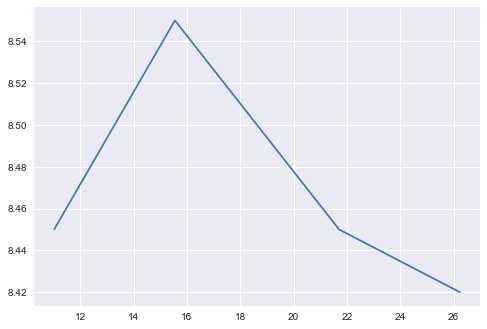

In [574]:
plt.plot(galactocentric_distances,[Oa,Ob,Oc,Od])

In [ ]:
#fluxes from kelsie
normal_flux_a =  [
                  3.22e-11,
                  2.09e-13,
                  2.39e-11,
                  2.60e-11,
                  7.82e-11,
                  9.27e-11,
                 ]

normal_flux_b =  [
                  2.34e-11,
                  2.25e-13,
                  1.24e-11,
                  1.53e-11,
                  4.64e-11,
                  3.97e-11,
                 ]

normal_flux_c =  [
                  6.79e-12,
                  1.96e-13,
                  4.78e-12,
                  7.37e-12,
                  2.23e-11,
                  1.42e-11,
                 ]

normal_flux_d =  [
                  2.09e-11,
                  1.76e-12,
                  2.04e-11,
                  4.43e-11,
                  1.32e-10,
                  5.99e-11,
                 ]

# Creating a dataframe to place all of our calculated data for each individual line. 

indexx = ['N_Flux_a:', 'N_Flux_b:', 'N_Flux_c:', 'N_Flux_d:']

flux_df = pd.DataFrame(data=[normal_flux_a, normal_flux_b, normal_flux_c, normal_flux_d], index = indexx, columns=lines)
flux_df